In [10]:
# Please use python 3.0 for this code

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
#from matplotlib import pyplot as plt


df = pd.read_csv('foam_1click_10min_clamp.csv')
I = df.Time
h = df.Height


#v_error = df.VUncertainty #If you have systematic uncertainties use this to add them. 
#I_error = df.IUncertainty


In [11]:
##   Significant Figures Check in 

# What are the significant figures on these functions below? 

a = 1.2*0.0000403

b = 100/(58**2)

c = (1/2) * math.pi

d = a/c**3



In [14]:
## Standard Deviation

i_std = np.std(I)

np.std(df) #Why does this work in python but not in matlab?

i_mean = np.mean(I)

# How do you add a print statement here? 

i_stdError = i_std / np.sqrt(i_mean)

The slope is:  -0.025725062349055687 so the equation of this line is V =  -0.025725062349055687 *I +  30.42096701335826


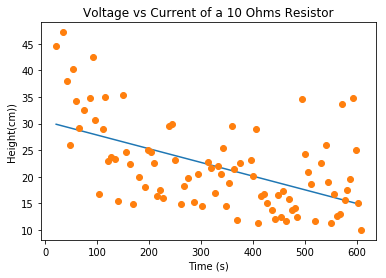

<Figure size 432x288 with 0 Axes>

In [9]:

#This code will plot the graph with error bars and a linear fit. 
#plt.savefig('Resistor.jpg')
m, b = np.polyfit(I,h,1) #If linear looks like it's the line that fits best
f = plt.plot(I, m*I + b)

plt.errorbar(I, h, fmt='o')
plt.ylabel('Height(cm))')
plt.xlabel('Time (s)')
plt.title('Voltage vs Current of a 10 Ohms Resistor')
print('The slope is: ',m, 'so the equation of this line is V = ',m,'*I + ',b)

plt.show()
plt.savefig("resistor.jpg", bbox_inches='tight', dpi=150, )
plt.show()

(array([13., 21., 13., 16.,  5.,  7.,  8.,  1.,  2.,  2.]),
 array([10.007 , 13.7246, 17.4422, 21.1598, 24.8774, 28.595 , 32.3126,
        36.0302, 39.7478, 43.4654, 47.183 ]),
 <a list of 10 Patch objects>)

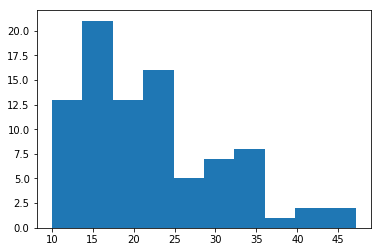

In [11]:
plt.hist(h)

In [32]:
"""
Created on Sun Apr 11 21:12:08 2021

Propogates the error from the omega of the dampening force

@author: Charlie Tribble
"""


from sympy import *

r, l, c = symbols('r l c')

r_val = 10.0         # resistance
l_val = 1e-3        # inductance
c_val = 3e-6        # capacitance

r_error = r_val * 0.05     # uncertainty of resistance
l_error = l_val * 0.10     # uncertainty of inductance
c_error = c_val * 0.10     # uncertainty of capacitance


In [33]:
gamma = r/l
omega = sqrt(1/(l * c) - (r ** 2)/(4 * (l ** 2)))    # eq for omega of the damping force

partial_gr = diff(gamma, r)      # partial derivative of gamma with respect to r
partial_gl = diff(gamma, l)      # partial derivative of gamma with respect to l

gamma_error = ((partial_gr.evalf(subs={r: r_val, l: l_val, c: c_val}) * r_error) ** 2 \
             + (partial_gl.evalf(subs={r: r_val, l: l_val, c: c_val}) * l_error) ** 2) ** 0.5

partial_or = diff(omega, r)      # partial derivative of omega with respect to r
partial_ol = diff(omega, l)      # partial derivative of omega with respect to l
partial_oc = diff(omega, c)      # partial derivative of omega with respect to c

omega_error = ((partial_or.evalf(subs={r: r_val, l: l_val, c: c_val}) * r_error) ** 2 \
             + (partial_ol.evalf(subs={r: r_val, l: l_val, c: c_val}) * l_error) ** 2 \
             + (partial_oc.evalf(subs={r: r_val, l: l_val, c: c_val}) * c_error) ** 2) ** 0.5
    
print("Gamma Uncertiainty: {0}\nOmega Uncertainty: {1}".format(gamma_error, omega_error))


Gamma Uncertiainty: 1118.03398874989
Omega Uncertainty: 1247.74571502745
